# (GoBike System Data)
## by (Mostafa Mohamed Mostafa)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df[['start_time','end_time']]= df[['start_time','end_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df['user_type']= df['user_type'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(183412, 16)

### What is the structure of your dataset?

> dataset has 183412 rows and 16 column .

### What is/are the main feature(s) of interest in your dataset?

> duration , user type and start station .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start time is the basic features .

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

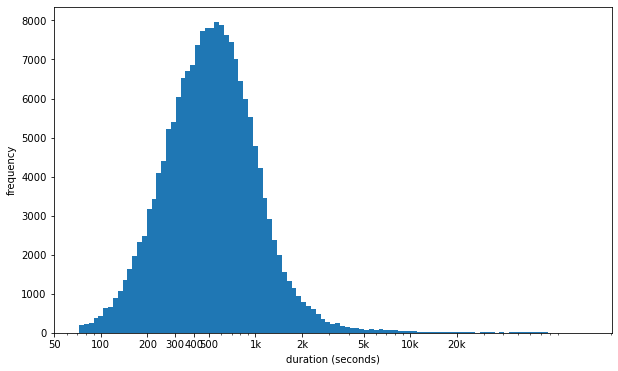

In [18]:
plt.figure(figsize=[10,6])
bins= 11** np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max())+0.03, 0.03)
plt.hist(data=df, x='duration_sec',bins=bins)
plt.xscale('log')
plt.xticks([50,100,200,300,400,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,200,300,400,500,'1k','2k','5k','10k','20k'])
plt.xlabel('duration (seconds)')
plt.ylabel('frequency');

> the most common values almost in the range of 200:1K seconds.

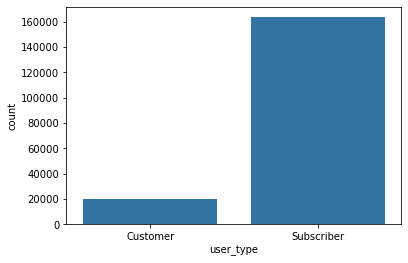

In [19]:
base_color= sb.color_palette()[0]
sb.countplot(data=df, x='user_type',color=base_color);

> Subscriber type is the most common type

In [26]:
df['month']= df.start_time.dt.strftime('%b')
df['day']= df.start_time.dt.strftime('%a')
df['hour']= df.start_time.dt.strftime('%H')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day_week,start_hour,month,week,hour,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,Feb,Thu,17,Feb,Thu,17,Thu
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,Feb,Thu,18,Feb,Thu,18,Thu
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,Feb,Thu,12,Feb,Thu,12,Thu
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,Feb,Thu,17,Feb,Thu,17,Thu
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,Feb,Thu,23,Feb,Thu,23,Thu


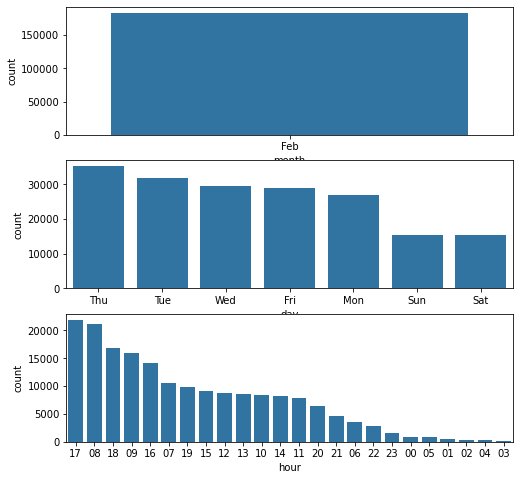

In [35]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'month', color = default_color, order=df.month.value_counts().index, ax = ax[0])
sb.countplot(data = df, x = 'day', color = default_color, order=df.day.value_counts().index, ax = ax[1])
sb.countplot(data = df, x = 'hour', color = default_color, order=df.hour.value_counts().index, ax = ax[2]);

> we notice that 

1- all trips happened at February month.
2- Wednesday , Friday  almost equal .
3- Thursday have the most bikers.
4- 5 PM, 8 AM is the most hours have bikers.

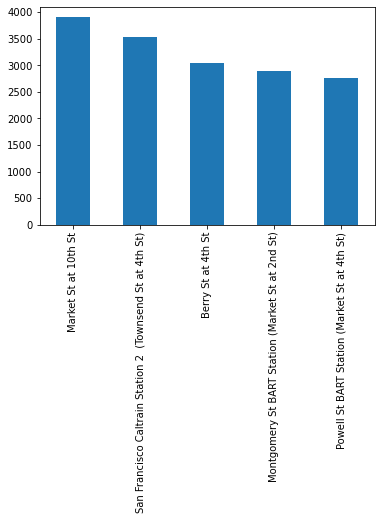

In [28]:
df.start_station_name.value_counts(sort=True, ascending=False)[:5].plot(kind='bar');

> the most 5 start station .

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

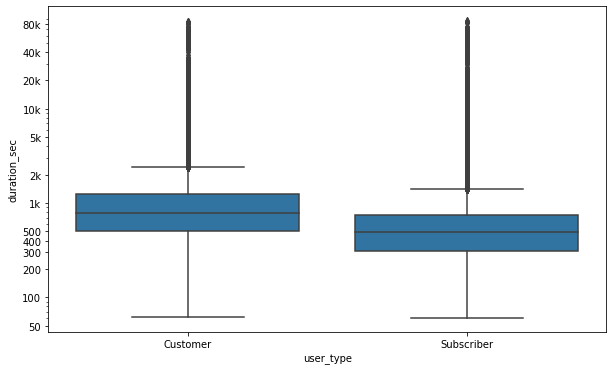

In [29]:
plt.figure(figsize=[10,6])
sb.boxplot(data=df, x='user_type', y='duration_sec', color=base_color)
plt.yscale('log')
plt.yticks([50,100,200,300,400,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,300,400,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);

> the average customer duration is higher than subscriber although the number of subscriber is greater than number of customer .

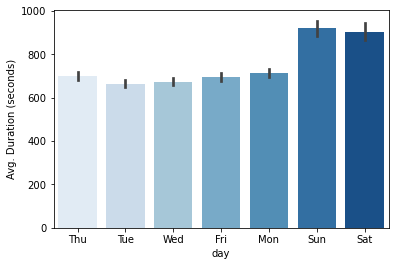

In [36]:
sb.barplot(data = df, x = 'day', y = 'duration_sec', palette='Blues',order=df.day.value_counts().index)
plt.ylabel('Avg. Duration (seconds)');

> Saturday and Sunday have the most average duration.

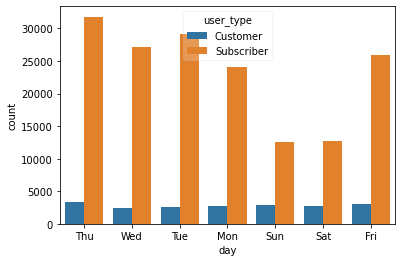

In [32]:
ax = sb.countplot(data = df, x = 'day', hue = 'user_type')
ax.legend(loc = 9, framealpha = 0.2, title = 'user_type');

> Thursday has the most bikers in customer and subscriber type .

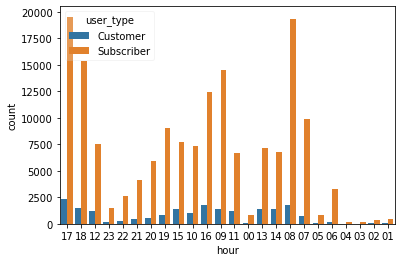

In [33]:
ax = sb.countplot(data = df, x = 'hour', hue = 'user_type')
ax.legend(loc = 2, framealpha = 0.2, title = 'user_type');

> 5 PM, 4 PM has the most bikers in customer type.

> 5 PM and 8 AM has the most bikers in subscriber type.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

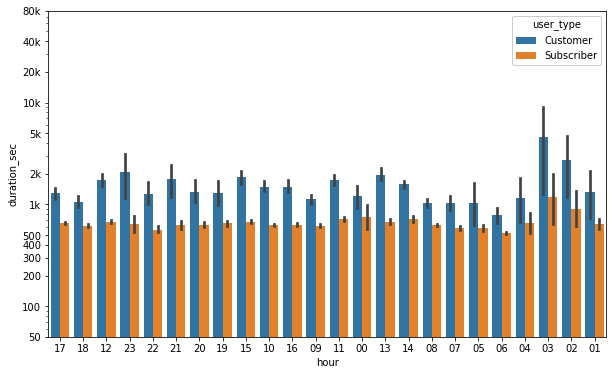

In [34]:
plt.figure(figsize=[10,6])
ax = sb.barplot(data = df, x = 'hour', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 1, framealpha = 1, title = 'user_type')
plt.yscale('log')
plt.yticks([50,100,200,300,400,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,300,400,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);

> for customer type 11 PM the duration of biking is longer than any hour.

> for subscriber type 2 AM, 3 AM the duration of biking is longer than any hour